## Zadanie: przestępczość

1) Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
2) Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
3) Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
4) Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
5) Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.


Rasa z największym odsetkiem ofiar z oznakami choroby psychicznej: W (28.80%)
Liczba interwencji według dnia tygodnia:
day_of_week
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64


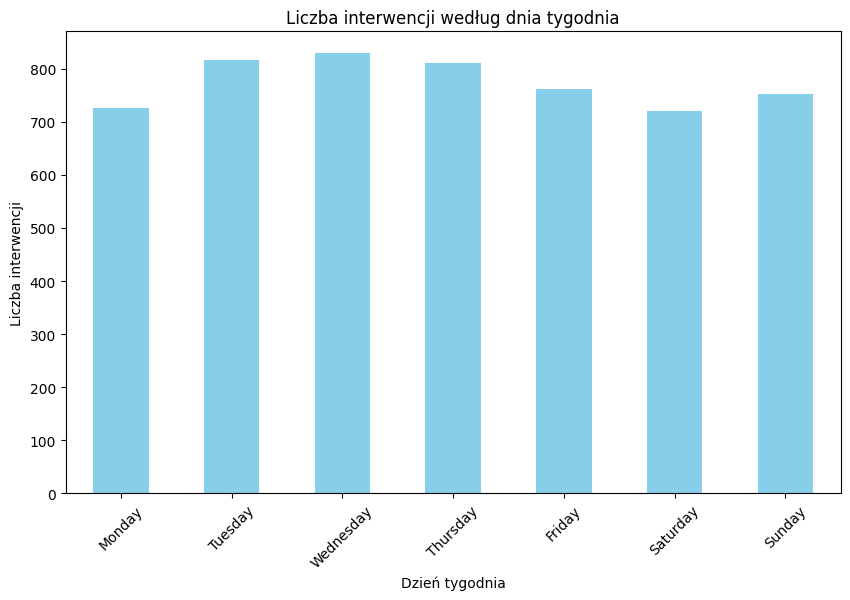

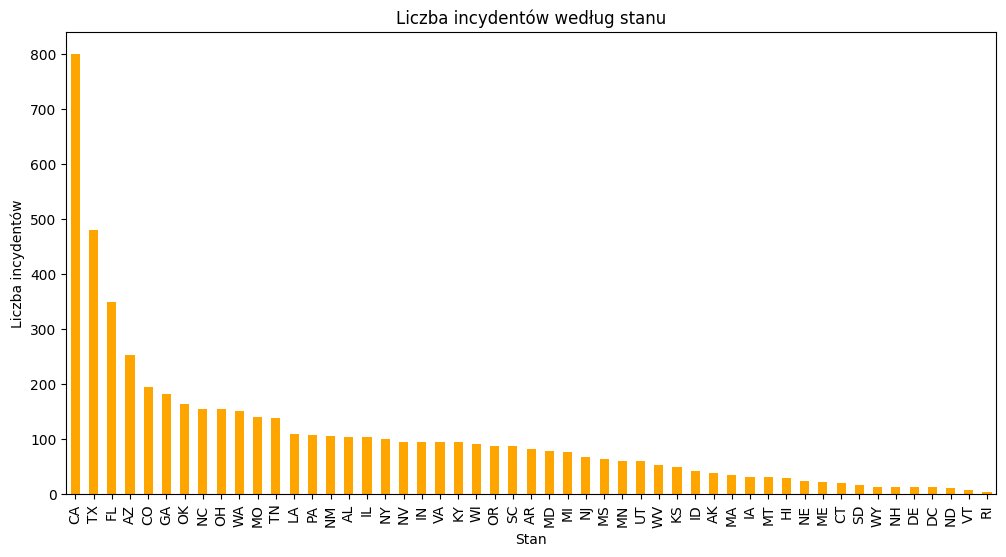

In [4]:
import pandas as pd

# Wczytanie danych z pliku CSV
df = pd.read_csv('fatal-police-shootings-data.csv')

# Grupowanie danych według rasy i oznak choroby psychicznej
grouped = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)

# Obliczenie odsetka ofiar z oznakami choroby psychicznej
grouped['mental_illness_percentage'] = grouped[True] / (grouped[True] + grouped[False]) * 100

# Znalezienie rasy z największym odsetkiem
max_race = grouped['mental_illness_percentage'].idxmax()
max_percentage = grouped['mental_illness_percentage'].max()

print(f"Rasa z największym odsetkiem ofiar z oznakami choroby psychicznej: {max_race} ({max_percentage:.2f}%)")

# Konwersja kolumny 'date' na typ datetime
df['date'] = pd.to_datetime(df['date'])

# Dodanie kolumny z dniem tygodnia
df['day_of_week'] = df['date'].dt.day_name()

# Zliczenie interwencji według dnia tygodnia
interventions_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Liczba interwencji według dnia tygodnia:")
print(interventions_by_day)

import matplotlib.pyplot as plt

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
interventions_by_day.plot(kind='bar', color='skyblue')
plt.title('Liczba interwencji według dnia tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba interwencji')
plt.xticks(rotation=45)
plt.show()

# Zliczenie liczby incydentów w każdym stanie
incidents_by_state = df['state'].value_counts()

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
incidents_by_state.plot(kind='bar', color='orange')
plt.title('Liczba incydentów według stanu')
plt.xlabel('Stan')
plt.ylabel('Liczba incydentów')
plt.xticks(rotation=90)
plt.show()